In [1]:
import glob
import pandas as pd
import numpy as np
import pickle as pk
import matplotlib.pyplot as plt

rewards_train = {'rl':{}, 'baseline':{}, 'random':{}}
rewards_val = {'rl':{}, 'baseline':{}, 'random':{}}
paths = glob.glob('runs/rewards/*.pk')
for path_ in paths:
    name = 'sim_' + path_.split('rewards_')[-1].split('.pk')[0]
    with open(path_, 'rb') as f:
        rewards_i = pk.load(f)
        for k in ['rl', 'baseline', 'random']:
            rewards_train[k].update({name: rewards_i[k]['train']})
            rewards_val[k].update({name: rewards_i[k]['val']})

rewards_train = {k:pd.DataFrame(v) for k, v in rewards_train.items()}
rewards_val = {k:pd.DataFrame(v) for k, v in rewards_val.items()}

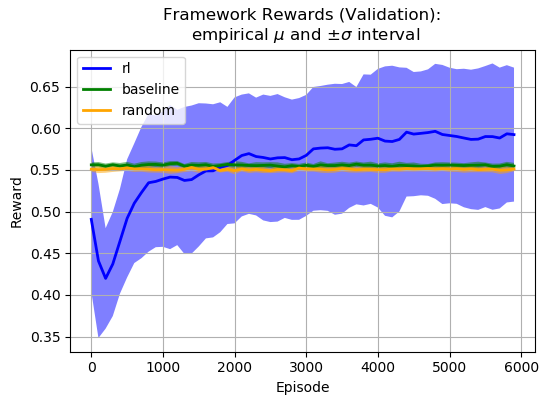

In [4]:
t = np.arange(60)*100
fig, ax = plt.subplots(1, dpi=100)
strats = list(zip(['rl', 'baseline', 'random'], ['blue', 'green', 'orange']))

for strategy, color in strats:
    mu = rewards_train[strategy].mean(axis=1)
    sigma = rewards_train[strategy].std(axis=1)
    ax.plot(t, mu, lw=2, label=strategy, color=color)
    ax.fill_between(t, mu+sigma, mu-sigma, facecolor=color, alpha=0.5)

# for i in range(15,20):
#     ax.plot(t, rewards_train['rl'][f'sim_{i}'].values)
    
ax.set_title('Framework Rewards (Validation):\n empirical $\mu$ and $\pm \sigma$ interval')
ax.legend(loc='upper left')
ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.grid()
fig.savefig('results.png', dpi=120)

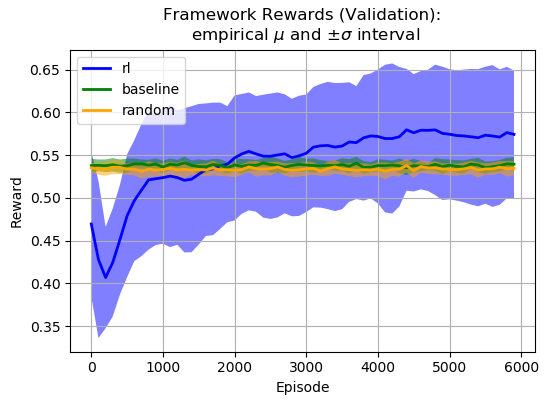

In [5]:
t = np.arange(60)*100
fig, ax = plt.subplots(1, dpi=100)
strats = list(zip(['rl', 'baseline', 'random'], ['blue', 'green', 'orange']))

for strategy, color in strats:
    mu = rewards_val[strategy].mean(axis=1)
    sigma = rewards_val[strategy].std(axis=1)
    ax.plot(t, mu, lw=2, label=strategy, color=color)
    ax.fill_between(t, mu+sigma, mu-sigma, facecolor=color, alpha=0.5)

# for i in range(15,20):
#     ax.plot(t, rewards_train['rl'][f'sim_{i}'].values)
    
ax.set_title('Framework Rewards (Validation):\n empirical $\mu$ and $\pm \sigma$ interval')
ax.legend(loc='upper left')
ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.grid()
fig.savefig('results.png', dpi=120)

No handles with labels found to put in legend.


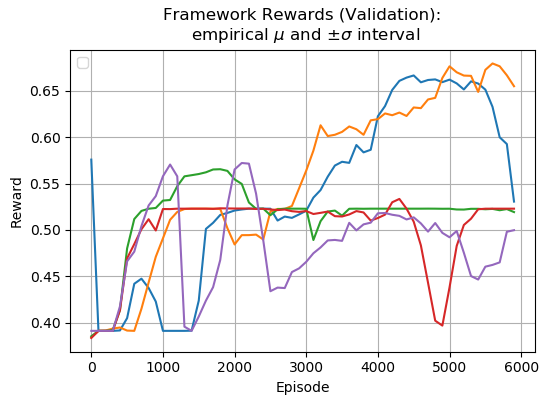

In [19]:
t = np.arange(60)*100
fig, ax = plt.subplots(1, dpi=100)
strats = list(zip(['rl', 'baseline', 'random'], ['blue', 'green', 'orange']))

# for strategy, color in strats:
#     mu = rewards_val[strategy].mean(axis=1)
#     sigma = rewards_val[strategy].std(axis=1)
#     ax.plot(t, mu, lw=2, label=strategy, color=color)
#     ax.fill_between(t, mu+sigma, mu-sigma, facecolor=color, alpha=0.5)

for i in range(0,5):
    ax.plot(t, rewards_train['rl'][f'sim_{i}'].values)
    
ax.set_title('Framework Rewards (Validation):\n empirical $\mu$ and $\pm \sigma$ interval')
ax.legend(loc='upper left')
ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.grid()
fig.savefig('results.png', dpi=120)

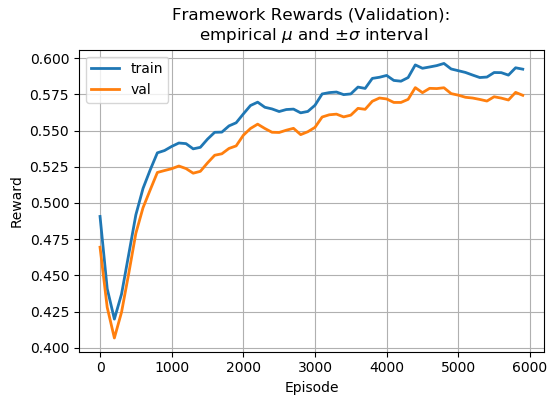

In [9]:
t = np.arange(60)*100
fig, ax = plt.subplots(1, dpi=100)
strats = list(zip(['rl', 'baseline', 'random'], ['blue', 'green', 'orange']))

mu = rewards_train['rl'].mean(axis=1)
ax.plot(t, mu, lw=2, label='train')

mu = rewards_val['rl'].mean(axis=1)
ax.plot(t, mu, lw=2, label='val'.)
    
ax.set_title('Framework Rewards (Validation):\n empirical $\mu$ and $\pm \sigma$ interval')
ax.legend(loc='upper left')
ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.grid()
fig.savefig('results.png', dpi=120)

No handles with labels found to put in legend.


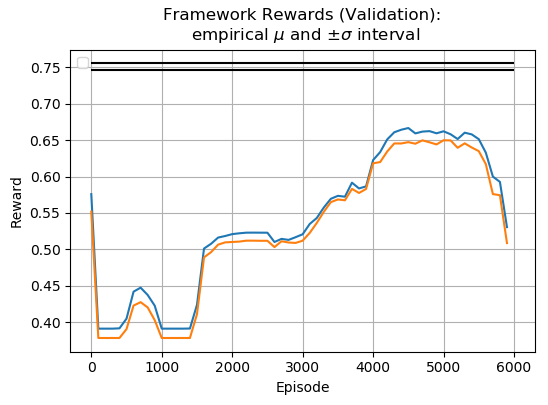

In [18]:
t = np.arange(60)*100
fig, ax = plt.subplots(1, dpi=100)
strats = list(zip(['rl', 'baseline', 'random'], ['blue', 'green', 'orange']))

for i in range(0,1):
    path_ = f'runs/rewards/rewards_{i}.pk'
    with open(path_, 'rb') as f:
        rewards_i = pk.load(f)
    ax.plot(t, rewards_train['rl'][f'sim_{i}'].values)
    ax.plot(t, rewards_val['rl'][f'sim_{i}'].values)
    ax.hlines(y=rewards_i['target']['train'], xmin=0, xmax=6000)
    ax.hlines(y=rewards_i['target']['val'], xmin=0, xmax=6000)
    
ax.set_title('Framework Rewards (Validation):\n empirical $\mu$ and $\pm \sigma$ interval')
ax.legend(loc='upper left')
ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.grid()
fig.savefig('results.png', dpi=120)

In [16]:
rewards_i['target']['train']

{'train': 0.755321263679035, 'val': 0.7461017082222016}